In [25]:
import pandas as pd
import numpy as py
import datetime as date

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

import os

DIAS = [
    'Segunda-feira',
    'Terça-feira',
    'Quarta-feira',
    'Quinta-Feira',
    'Sexta-feira',
    'Sábado',
    'Domingo'
]


pd.options.display.float_format = '{:,.2f}'.format

# Leitura dos arquivos com informações dos trendtopics

In [3]:
source = "./"

dir_list = os.listdir(source)

os.chdir(source)

tt = pd.DataFrame()

for i in range(len(dir_list)):
    filename = dir_list[i]
    if filename.endswith('.txt'):
        print(filename)
        pdtt = pd.read_csv(filename, sep=";", header=None, names=['data','hashtag','qtd'], index_col=False, encoding='utf-8')
        pdtt.drop(pdtt[pdtt.qtd == 'None'].index, inplace=True)
        pdtt['qtd'] = pd.to_numeric(pdtt['qtd'])        
        tt = tt.append(pdtt,ignore_index=True)


trendtopics (1).txt
trendtopics - AWS Copy.txt
trendtopics - Copy (2).txt
trendtopics - Copy.txt
trendtopics AWS.txt
trendtopics-aws-natal.txt
trendtopics-aws.txt
trendtopics-baixado2.txt
trendtopics-set.txt
trendtopics.txt
trendtopicsNote.txt


## Quantidade de registros

In [4]:
tt.count()

data       1241800
hashtag    1241800
qtd        1241800
dtype: int64

In [5]:
tt.head()

,data,hashtag,qtd
0,06/11/2020 04:45:00,#EliminacaoAFazenda,99850
1,06/11/2020 04:45:00,#RenovaDiegoAlves,22793
2,06/11/2020 04:45:00,#TheVoiceBrasil,13927
3,06/11/2020 04:45:00,Amapá,80592
4,06/11/2020 04:45:00,CHUVA DE CONFETTI,14831


## Tratamento dos dados

A captura de dados aconteceu usando mais de uma máquina no começo e como existe a possibilidade de existir dados repetidos, foi feito um agrupamento para retirar a duplicidade nos horários.

E como não é possível garantir que exista informação em toda fração de 5 minutos, as quantidades de tweetts foram agrupados com valor médio

In [6]:
tt_unique = tt.groupby(by=['data','hashtag'], as_index=False ).qtd.agg('max')

#### Retirada de # da hashtag, padronização em caixa alta e soma dos iguais na mesma hora

In [7]:
tt_unique['hashtag'] = tt_unique.apply(lambda row: row['hashtag'].upper().replace('#',''), axis=1)


### Tipo de dados Date 

In [8]:
tt_unique['data'] = tt_unique.apply(lambda row: date.datetime.strptime(row.data,'%d/%m/%Y %H:%M:%S'), axis=1)

### Quantidade de registros únicos

In [9]:
tt_unique.count()

data       799385
hashtag    799385
qtd        799385
dtype: int64

### Período dos dados

In [10]:
print('De {} até {}'.format(tt_unique.data.min(),tt_unique.data.max()))

De 2020-10-20 19:02:00 até 2021-02-06 04:35:00


### Criando colunas para separar horas e dia da semana

In [11]:
# criando colunas com dia da semana em número (0-6) e texto
tt_unique['nDiaSemana'] = tt_unique.apply(lambda row: row.data.weekday(), axis=1)
tt_unique['diaSemana'] = tt_unique.apply(lambda row: DIAS[row.nDiaSemana], axis=1)
tt_unique['hora'] = tt_unique.apply(lambda row: row.data.hour, axis=1)
tt_unique['dma'] = tt_unique.apply(lambda row: row.data.date() , axis=1)


In [12]:
# vendo o resultando
tt_unique.sort_values(by='dma')

,data,hashtag,qtd,nDiaSemana,diaSemana,hora,dma
508619,2020-10-20 19:18:00,WAN BISSAKA,71957,1,Terça-feira,19,2020-10-20
508653,2020-10-20 19:20:00,SHAWN,89287,1,Terça-feira,19,2020-10-20
508652,2020-10-20 19:20:00,NAVAS,22226,1,Terça-feira,19,2020-10-20
508651,2020-10-20 19:20:00,ANSU FATI,29692,1,Terça-feira,19,2020-10-20
508650,2020-10-20 19:20:00,WAN BISSAKA,72142,1,Terça-feira,19,2020-10-20
...,...,...,...,...,...,...,...
208905,2021-02-06 03:20:00,O ARTHUR,112945,5,Sábado,3,2021-02-06
208906,2021-02-06 03:20:00,PAREDÃO,441360,5,Sábado,3,2021-02-06
208907,2021-02-06 03:20:00,PLANO,94404,5,Sábado,3,2021-02-06
208897,2021-02-06 03:20:00,HADDAD,90828,5,Sábado,3,2021-02-06


### Agrupando por hora

Agrupamento por hora será feito com média de ocorrências pra garantir que as hashtags tenham quantidades coerentes mesmo que algum período da hora não tenha capturado dados

In [13]:
tt_unique_hora = tt_unique.groupby(by=['dma','hashtag','nDiaSemana','diaSemana','hora'], as_index=False ).qtd.agg('mean')

In [14]:
tt_unique_hora = tt_unique_hora.sort_values(by=['dma','hora','hashtag'])
tt_unique_hora

,dma,hashtag,nDiaSemana,diaSemana,hora,qtd
0,2020-10-20,ANSU FATI,1,Terça-feira,19,"29,263.25"
1,2020-10-20,BARCELONA,1,Terça-feira,19,"102,674.33"
2,2020-10-20,BARÇA,1,Terça-feira,19,"74,466.33"
3,2020-10-20,BORUSSIA,1,Terça-feira,19,"12,219.00"
4,2020-10-20,BRUNO FERNANDES,1,Terça-feira,19,"40,375.58"
...,...,...,...,...,...,...
80735,2021-02-06,SE A KAROL,5,Sábado,4,"117,021.75"
80744,2021-02-06,STFNAOGOVERNA,5,Sábado,4,"41,113.62"
80747,2021-02-06,THAIS,5,Sábado,4,"176,134.62"
80763,2021-02-06,XEPA,5,Sábado,4,"42,585.12"


### Preparar DataFrames

#### Por dia do mês

Depois de calculada a média por hora, para exibir a informação durante todo o período decidi usar o somatório das quantidades pra ter uma noção mais próxima da quantidade de tweets que aconteceram

In [44]:
diaMes = tt_unique_hora.groupby(by=['dma'], as_index=False).qtd.agg('sum')

In [45]:
diaMes

,dma,qtd
0,2020-10-20,"2,887,235.46"
1,2020-10-27,"1,185,830.20"
2,2020-10-28,"98,255,860.04"
3,2020-10-29,"107,167,841.06"
4,2020-10-30,"114,764,236.47"
...,...,...
94,2021-02-02,"143,793,420.80"
95,2021-02-03,"91,278,069.18"
96,2021-02-04,"80,123,641.95"
97,2021-02-05,"65,098,469.63"


<AxesSubplot:xlabel='dma', ylabel='qtd'>

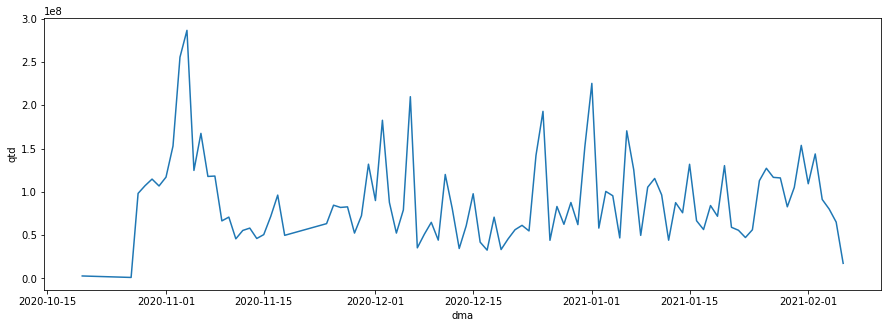

In [54]:
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=diaMes.dma, y=diaMes.qtd, ci=None, ax=ax, markers="o")

#### Por hashtag por hora por dia da semana

Soma de quantidades usado com mesmo raciocínio do gráfico anterior, de aproximar com a quantidade real

In [55]:
#cálculo do valor total por hash, dia, hora
hashHora = tt_unique_hora.groupby(by=['hashtag','nDiaSemana','diaSemana','hora'], as_index=False).qtd.agg('sum')

In [57]:
hashHora

,hashtag,nDiaSemana,diaSemana,hora,qtd
0,'DYNAMITE',5,Sábado,11,"332,590.00"
1,1 - BOLSONARO,5,Sábado,21,"73,353.18"
2,1 - BOLSONARO,5,Sábado,22,"71,658.08"
3,1 - BOLSONARO,5,Sábado,23,"69,863.42"
4,1 - BOLSONARO,6,Domingo,0,"67,241.83"
...,...,...,...,...,...
72608,해피됴데이,0,Segunda-feira,18,"597,085.75"
72609,형원이란_다정함이_내린_날,3,Quinta-Feira,15,"67,088.70"
72610,형원이란_다정함이_내린_날,3,Quinta-Feira,16,"106,121.67"
72611,형원이란_다정함이_내린_날,3,Quinta-Feira,17,"136,164.42"


### Agrupamentos para visualização

Nos dataframes e gráficos seguintes, as quantidades foram calculadas com médias para que efeitos de outliers fossem diminuidos com o tempo

#### Média por dia da semana

<BarContainer object of 7 artists>

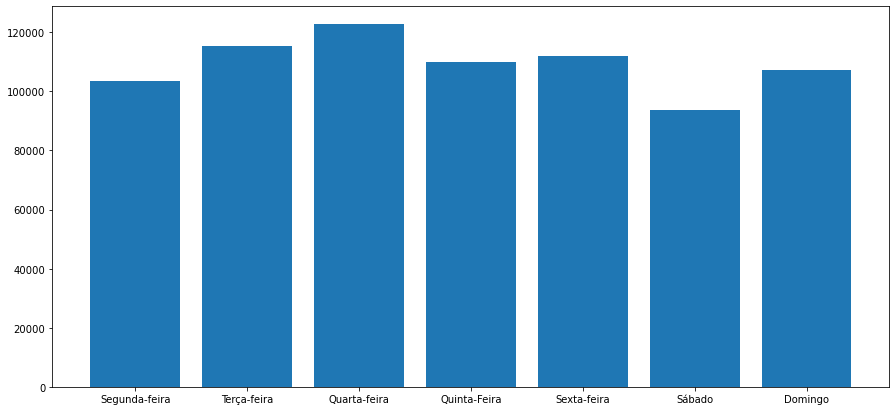

In [38]:
diaQTD = diaHora.groupby(by=['nDiaSemana'], as_index=False).qtd.agg('mean')
diaQTD['diaSemana'] = diaQTD.apply(lambda row: DIAS[int(row.nDiaSemana)], axis=1)

fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(diaQTD.diaSemana,diaQTD.qtd)

#### Média por hora

<BarContainer object of 24 artists>

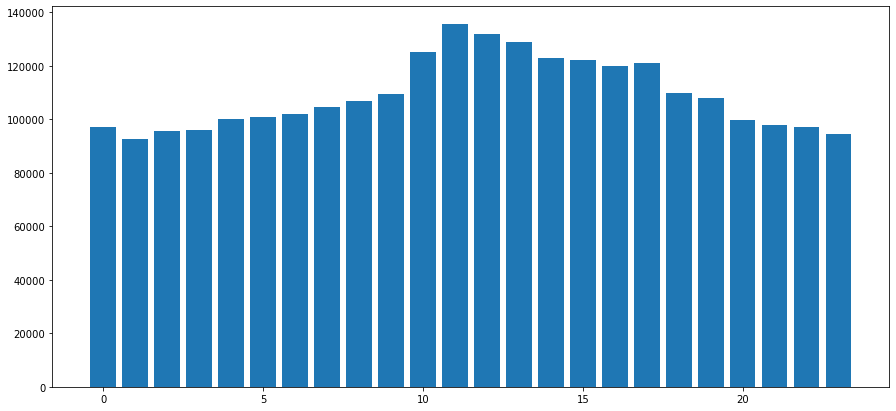

In [36]:
#quantidade por hora
horaQTD = diaHora.groupby(by=['hora'], as_index=False).qtd.agg('mean')
#horaQTD
fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(horaQTD.hora,horaQTD.qtd)

#### Média por hora por dia da semana

In [62]:
#cálculo do valor médio por dia, hora
diaHora = tt_unique_hora.groupby(by=['nDiaSemana','diaSemana','hora'], as_index=False).qtd.agg('mean')
diaHora

,nDiaSemana,diaSemana,hora,qtd
0,0,Segunda-feira,0,"75,205.69"
1,0,Segunda-feira,1,"78,713.79"
2,0,Segunda-feira,2,"89,905.56"
3,0,Segunda-feira,3,"92,330.94"
4,0,Segunda-feira,4,"96,804.57"
...,...,...,...,...
163,6,Domingo,19,"79,624.91"
164,6,Domingo,20,"71,787.55"
165,6,Domingo,21,"69,634.08"
166,6,Domingo,22,"70,409.75"


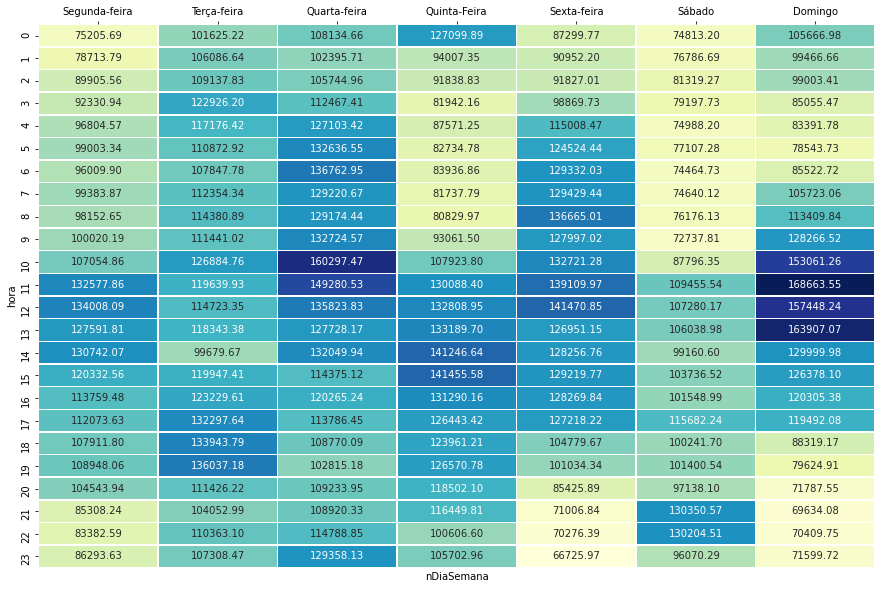

In [63]:
diahoratabela = diaHora[['nDiaSemana','hora','qtd']].pivot(index='hora', columns='nDiaSemana', values='qtd')
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(diahoratabela, cmap='YlGnBu', annot=True, fmt=".2f", vmin=diaHora.qtd.min(), vmax=diaHora.qtd.max(), linewidths=0.5, linecolor='white', cbar=False)

plt.xticks(np.arange(7) + .5, labels=DIAS)
ax.xaxis.tick_top()

plt.show()

### Gravação de arquivo de dado analítico tratado

In [22]:
tt_unique_hora.to_csv('trendsTratados.csv')